# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


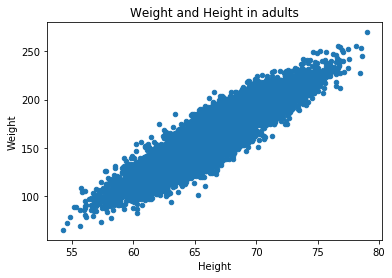

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

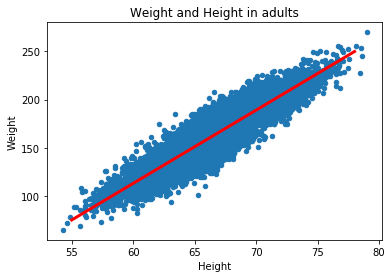

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [111]:
yhat = line(x, w=7, b=-300)

In [112]:
yhat

array([  85.        ,   86.76767677,   88.53535354,   90.3030303 ,
         92.07070707,   93.83838384,   95.60606061,   97.37373737,
         99.14141414,  100.90909091,  102.67676768,  104.44444444,
        106.21212121,  107.97979798,  109.74747475,  111.51515152,
        113.28282828,  115.05050505,  116.81818182,  118.58585859,
        120.35353535,  122.12121212,  123.88888889,  125.65656566,
        127.42424242,  129.19191919,  130.95959596,  132.72727273,
        134.49494949,  136.26262626,  138.03030303,  139.7979798 ,
        141.56565657,  143.33333333,  145.1010101 ,  146.86868687,
        148.63636364,  150.4040404 ,  152.17171717,  153.93939394,
        155.70707071,  157.47474747,  159.24242424,  161.01010101,
        162.77777778,  164.54545455,  166.31313131,  168.08080808,
        169.84848485,  171.61616162,  173.38383838,  175.15151515,
        176.91919192,  178.68686869,  180.45454545,  182.22222222,
        183.98989899,  185.75757576,  187.52525253,  189.29292

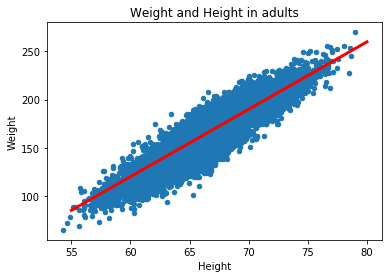

In [113]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [114]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [115]:
X = df[['Height']].values
y_true = df['Weight'].values

In [116]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [117]:
y_pred = line(X)

In [118]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [119]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

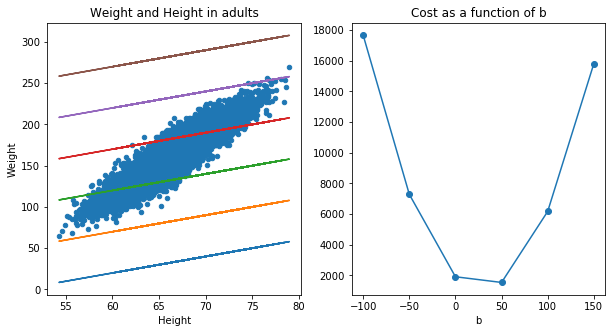

In [120]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [144]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [145]:
model = Sequential()

In [146]:
model.add(Dense(1, input_shape=(1,)))

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [149]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 633.3700     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 550.3582     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 479.9606     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 452.3432     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 379.0533     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 359.1164     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 312.4016     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 273.7303     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 265.3222     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 250.4740     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 235.3798     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 211.3400     
E

In [150]:
y_pred = model.predict(X)

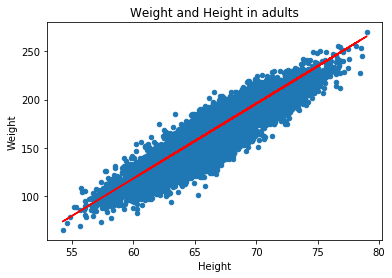

In [151]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [152]:
W, B = model.get_weights()

In [153]:
W

array([[ 7.78320122]], dtype=float32)

In [154]:
B

array([-348.99215698], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.717


### Train Test Split

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [157]:
len(X_train)

8000

In [158]:
len(X_test)

2000

In [159]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [160]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [161]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [162]:
from sklearn.metrics import mean_squared_error as mse

In [163]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	150.0
The Mean Squared Error on the Test set is:	148.8


In [164]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.854
The R2 score on the Test set is:	0.859


# Classification

In [165]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [166]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


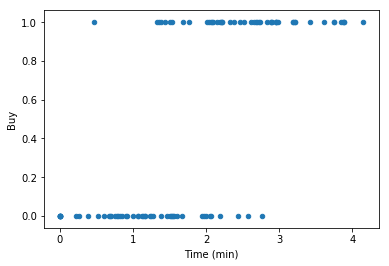

In [167]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [168]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [169]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [170]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [171]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 0.6419 - acc: 0.5800     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.6043 - acc: 0.6100     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.5720 - acc: 0.6900     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.5521 - acc: 0.8200     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5265 - acc: 0.8100     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.5133 - acc: 0.7300     
Epoch 7/25
100/100 [==============================] - 0s - loss: 0.4908 - acc: 0.8200     
Epoch 8/25
100/100 [==============================] - 0s - loss: 0.4862 - acc: 0.8300     
Epoch 9/25
100/100 [==============================] - 0s - loss: 0.4869 - acc: 0.7800     
Epoch 10/25
100/100 [==============================] - 0s - loss: 0.4623 - acc: 0.8100     
Epoch 11/25
100/100 [==============================] - 0s - loss: 0.4521 - acc: 0.8300   

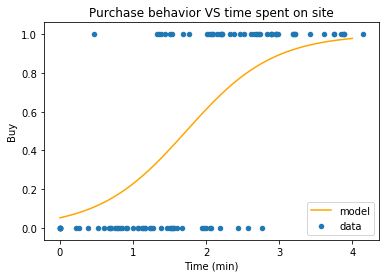

In [172]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [173]:
temp_class = model.predict(temp) > 0.5

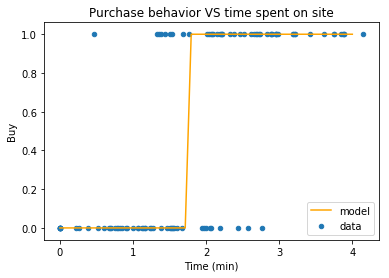

In [174]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [175]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [176]:
from sklearn.metrics import accuracy_score

In [177]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [179]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [180]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [181]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [182]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.850


## Cross Validation

In [191]:
from keras.wrappers.scikit_learn import KerasClassifier

In [195]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [196]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [197]:
from sklearn.model_selection import cross_val_score, KFold

In [198]:
cv = KFold(3, shuffle=True)

In [199]:
scores = cross_val_score(model, X, y, cv=cv)

In [200]:
scores

array([ 0.79411765,  0.78787879,  0.81818182])

In [201]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8001 ± 0.0131


## Confusion Matrix

In [202]:
from sklearn.metrics import confusion_matrix

In [203]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 8, 42]])

In [204]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [205]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,8,42


In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [207]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.824
Recall:  	0.840
F1 Score:	0.832


In [89]:
from sklearn.metrics import classification_report

In [208]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83        50
          1       0.82      0.84      0.83        50

avg / total       0.83      0.83      0.83       100



## Feature Preprocessing

### Categorical Features

In [209]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [210]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [211]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [212]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [213]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [214]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [215]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


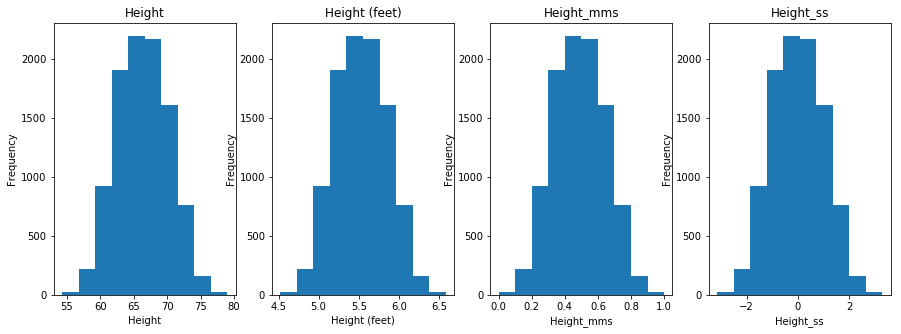

In [216]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).